# ASSIGNMENT - 2 - MACHINE LEARNING LAB
### CSE - C

### Question 1 
Implement Decision Tree Classifier for classification of Iris dataset
Load the data set
Split the data set to train and test sets
Train a Decision Tree using train set
Test the model using test set.
Find accuracy and confusion Matrix.

In [17]:
#importing necessary libraries
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [18]:
iris = load_iris() #loading the dataset
X, y = iris.data, iris.target
#splitting the dataset into 30% testing and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state = 0)
#4 features length and width of sepal and petal - 'sepal_length',
'sepal_width', 'petal_length', 'petal_width'

('sepal_width', 'petal_length', 'petal_width')

In [19]:
irisData = pandas.DataFrame(data = np.hstack((X,y.reshape(y.shape[0], 1),
[[iris["target_names"][int(classIdx)]] for classIdx in y])), \
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
"Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)
#extra feature of class name is added for better understanding

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


In [20]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion ="entropy", min_samples_split : int = 2 , min_samples_leaf = 1):
	#Importing the Decision tree classifier from sklearn:
	clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
	criterion = criterion,\
	min_samples_split = min_samples_split,\
	min_samples_leaf = min_samples_leaf,\
	splitter = "best",\
	random_state = 0,\
	)
	X_train, y_train = trainSet
	X_test, y_test = testSet
	clf = clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	print("Accuracy of the decision tree on the test set:\n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
	print("The confusion matrix is : ")
	plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)
	print("Here is a diagram of the tree created to evaluate each sample:")
	fig, ax = plt.subplots(figsize=(12,10))
	imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names =
	feature_names, class_names = class_names, impurity=False, proportion=True,
	rounded=True, fontsize = 12)
	plt.show()
	print(classification_report(y_test,y_pred))

In [21]:
def giveAnExample(n : int):
	performExperiment((X_train, y_train), (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

In [22]:
def plotDecisionBoundary(X, y, pair, clf):
	x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
	y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
	np.arange(y_min, y_max, 0.1))
	y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
	y_pred = y_pred.reshape(xx.shape)
	plt.figure(figsize=(8,6))
	plt.contourf(xx, yy, y_pred, alpha=0.4)
	plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
	plt.title("Decision Boundary for two features used in Decision Tree")
	# plt.legend()
	plt.show()
# with the increase in the number the tree become more complex to look but has better understanding

Accuracy of the decision tree on the test set:

0.911


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


c:\Users\prath\anaconda3\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


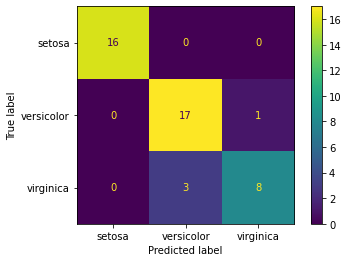

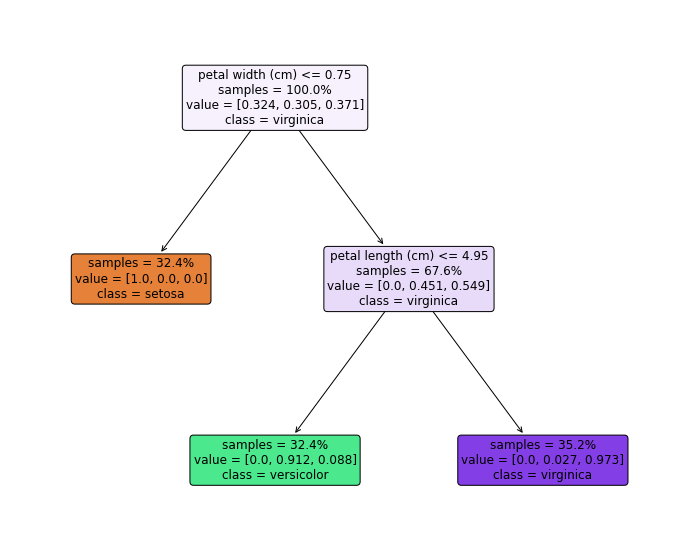

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45

Accuracy of the decision tree on the test set:

0.978


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


c:\Users\prath\anaconda3\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


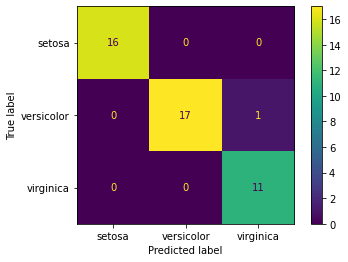

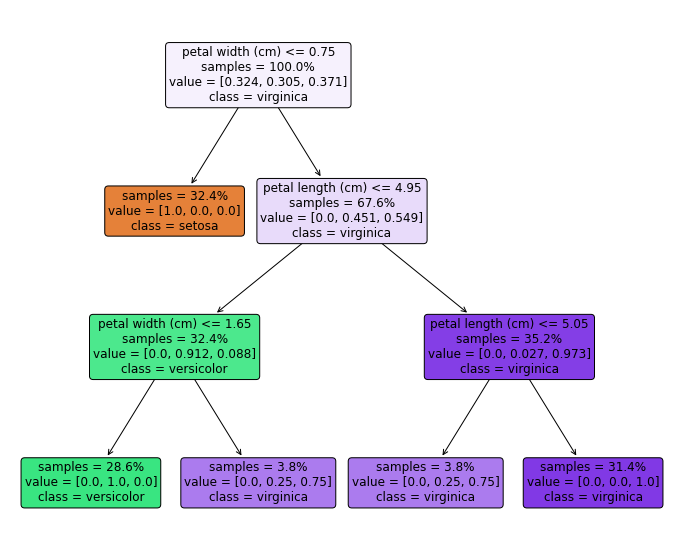

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the decision tree on the test set:

0.978


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


c:\Users\prath\anaconda3\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


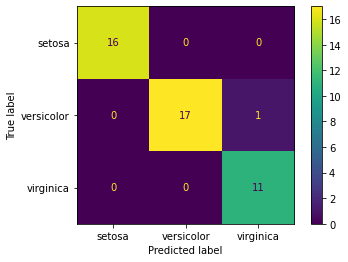

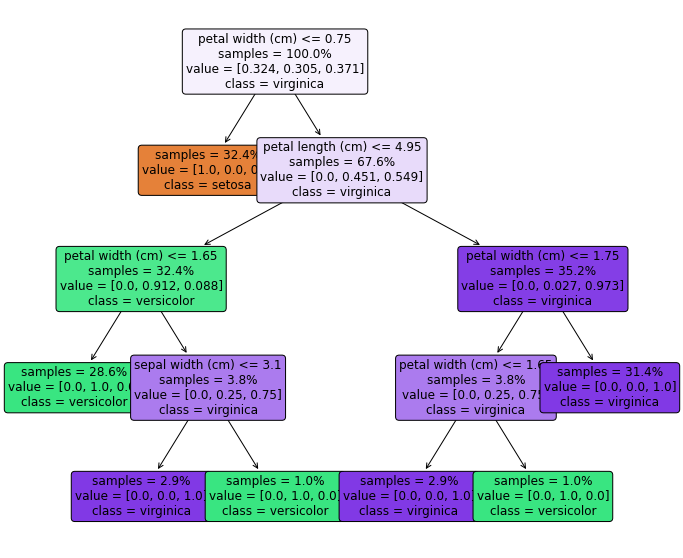

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [23]:
giveAnExample(2)
giveAnExample(3)
giveAnExample(4)

#### Question 3

Implement Random Forest Classifier for classification of Iris dataset
a. Load the data set
b. Split the data set to train and test sets
c. Train a Random Forest model using train set
d. Test the model using test set.
e. Find accuracy and confusion Matrix.

In [27]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import seaborn as sns

In [29]:
iris = load_iris() #loading the dataset
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
y,test_size=0.3,random_state=0)
#again splitting the testing and training dataset into 30% and 70% respectively
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
pred=random_forest.predict(X_test)
compare= pd.DataFrame({"Actual":y_test,"Prediction":pred})
compare.head()
compare.tail()

,Actual,Prediction
40,2,2
41,0,0
42,2,2
43,0,0
44,0,0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

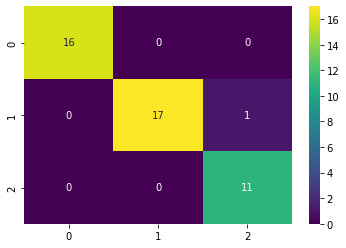

In [30]:
print(classification_report(y_test,pred))
cnf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(cnf_matrix,annot=True,fmt='g',cbar=True,cmap='viridis')